<a href="https://colab.research.google.com/github/eyv7jz/DS4001/blob/main/DS_4002_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Lung Cancer Incidence from Health and Behavioral Risk Factors
By: Brice Howe and Valyn Grebe


# Prior Research
*   Past research from the CDC and Endalie et al. have found air pollution, coughing of blood, and smoking to have the highest correlation with lung cancer
* Possible high correlations in our dataset include coughing and smoking
* Previous work from Endalie et al. and Pathan et al. have used many model types, some being decision trees, neural networks, random forests, k-nearest neighbors, etc.

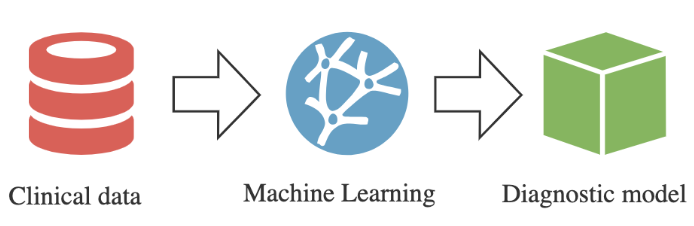


# Importance/Motivation
* 230,000 new patients in the US are diagnosed with lung cancer each year, and 73% of them die within five years of diagnosis
* Leading cause of cancer deaths worldwide comprising ~20% of all deaths due to cancer (Second leading cause is colon cancer comprising 9% of cancer deaths)
* Cancer will cost the global economy over 25 trillion dollars between 2020 and 2050 with lung cancer costing the greatest proportion across all cancer types
* Largest costs compared to all other cancers in the United States

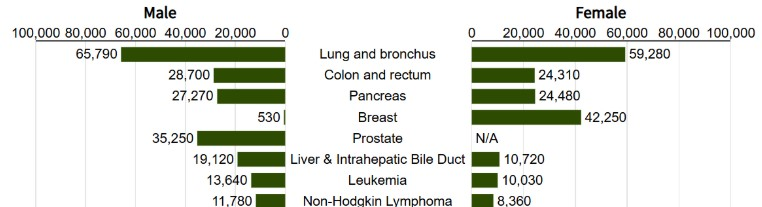

## Dataset

Predictor Variables:


*   Character: Gender (M or F)
*   Numeric: Age
*   Binary: Smoking, yellow fingers, anxiety, peer pressure, allergies, fatigue, chronic disease, wheezing, alcohol consumption, coughing, shortness of breath, swallowing difficulty, chest pain

Target/Response Variable:
Lung Cancer (Yes or No)


In [ ]:
# @title Source: Health Data Hub - Poltekkes Kemenkes Semarang
import pandas as pd
import numpy as np

lung_cancer = pd.read_csv('dataset.csv')
lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


*   Converted all 1/2 to 0/1 respectively for all relevant predictor variables
*   Converted NO and YES for the response variable (Lung Cancer) to 0 and 1
*   Converted F and M for Gender to 0 and 1

In [ ]:
# @title Cleaned Data
columns_to_transform = lung_cancer.columns.drop(['GENDER', 'AGE', 'LUNG_CANCER'])
lung_cancer[columns_to_transform] = lung_cancer[columns_to_transform].replace({2: 1, 1: 0})
lung_cancer['LUNG_CANCER'] = lung_cancer['LUNG_CANCER'].map({'NO': 0, 'YES': 1})
lung_cancer['GENDER'] = lung_cancer['GENDER'].map({'F': 0, 'M': 1})
lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,65,0,0,0,1,1,0,1,1,1,1,1,1,0,0
1,0,55,0,1,1,0,0,1,1,1,0,0,0,1,1,0
2,0,78,1,1,0,0,0,1,0,1,0,0,1,0,0,1
3,1,60,1,0,0,0,1,0,1,0,0,1,0,1,1,1
4,0,80,0,0,1,0,0,1,0,1,0,0,0,0,1,0


# Final Question: Can various health and behavioral risk factors predict lung cancer prevalence?

## Exploratory Data Analysis

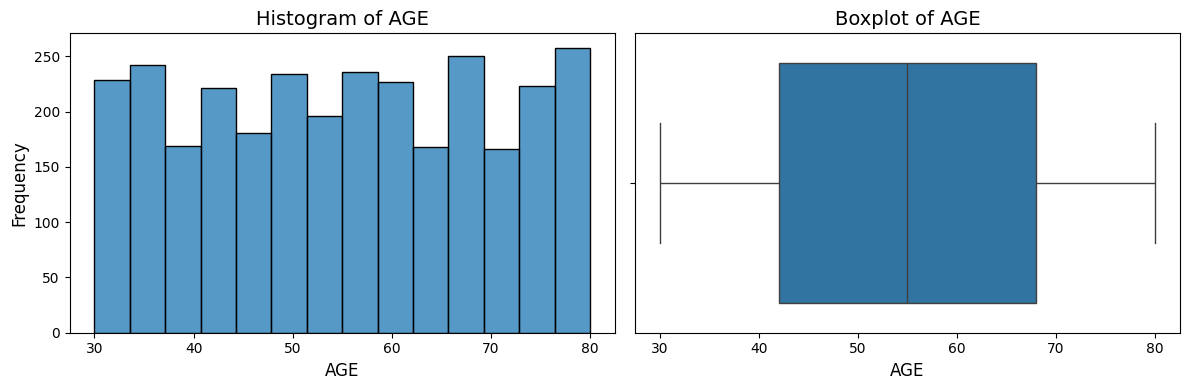

In [ ]:
# @title Age Distribution
import seaborn as sns
import matplotlib.pyplot as plt

var = 'AGE'

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(lung_cancer[var], ax=axes[0])
axes[0].set_title(f'Histogram of {var}', fontsize=14)
axes[0].set_xlabel(var, fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

sns.boxplot(data=lung_cancer, x=var, ax=axes[1])
axes[1].set_title(f'Boxplot of {var}', fontsize=14)
axes[1].set_xlabel(var, fontsize=12)

plt.tight_layout()
plt.show()

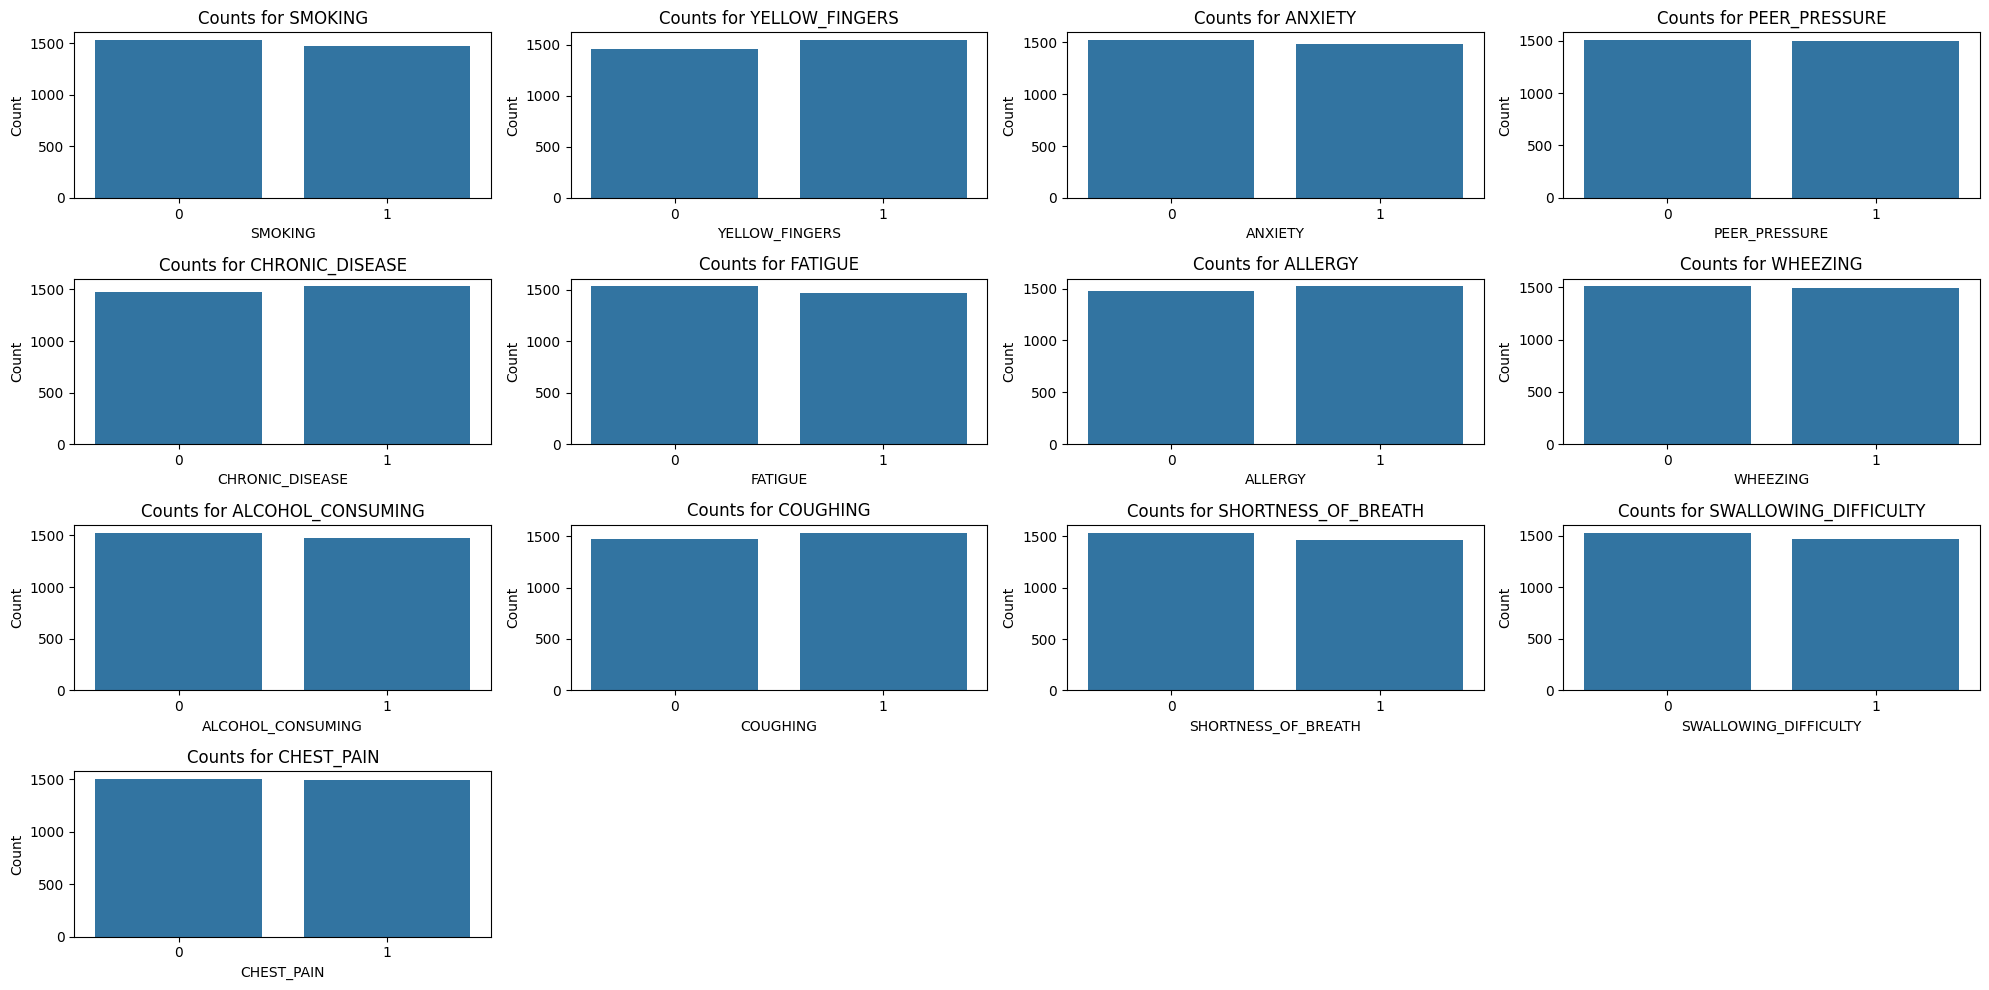

In [ ]:
# @title Counts for Binary Variables
binary_variables = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE',
    'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING',
    'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN'
]


n_cols = 4
n_rows = -(-len(binary_variables) // n_cols)


fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))

axes = axes.flatten()


for idx, var in enumerate(binary_variables):
    sns.countplot(x=var, data=lung_cancer, ax=axes[idx])
    axes[idx].set_title(f'Counts for {var}', fontsize=12)
    axes[idx].set_xlabel(var, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)


for i in range(len(binary_variables), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

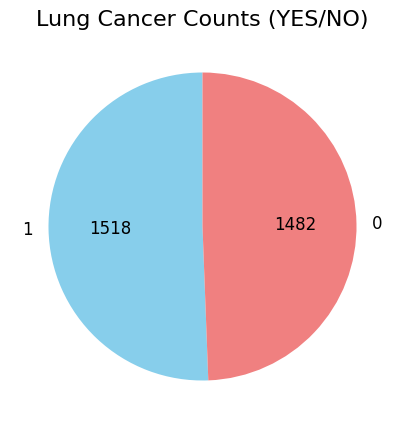

In [ ]:
# @title Lung Cancer Counts
lung_cancer_counts = lung_cancer['LUNG_CANCER'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(
    lung_cancer_counts,
    labels=lung_cancer_counts.index,
    autopct=lambda p: f'{int(round(p * sum(lung_cancer_counts) / 100))}',
    colors=['skyblue', 'lightcoral'],
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Lung Cancer Counts (YES/NO)', fontsize=16)
plt.show()

In [ ]:
# @title Factor Frequency with and without Cancer
import plotly.graph_objects as go

features = lung_cancer.columns.drop(['LUNG_CANCER', 'AGE', 'GENDER'])

cancer_freq = []
no_cancer_freq = []

for feature in features:
    cancer_freq.append(lung_cancer[lung_cancer['LUNG_CANCER'] == 1][feature].mean())
    no_cancer_freq.append(lung_cancer[lung_cancer['LUNG_CANCER'] == 0][feature].mean())

fig = go.Figure()

fig.add_trace(go.Bar(
    x=features,
    y=cancer_freq,
    name='Cancer',
    marker_color='lightcoral'
))

fig.add_trace(go.Bar(
    x=features,
    y=no_cancer_freq,
    name='No Cancer',
    marker_color='skyblue'
))

fig.update_layout(
    title='Comparison of Factor Frequencies in Patients with and without Lung Cancer',
    xaxis_title='Features (Factors)',
    yaxis_title='Frequency',
    barmode='group',  # Bars side by side
    xaxis_tickangle=-45,
    template='plotly_white',
    legend=dict(title='Group')
)

fig.show()

In [ ]:
# @title Summary Statistics
numerical_summary = lung_cancer.describe()
print(numerical_summary)

            GENDER          AGE      SMOKING  YELLOW_FINGERS      ANXIETY  \
count  3000.000000  3000.000000  3000.000000     3000.000000  3000.000000   
mean      0.504667    55.169000     0.491000        0.514000     0.494000   
std       0.500062    14.723746     0.500002        0.499887     0.500047   
min       0.000000    30.000000     0.000000        0.000000     0.000000   
25%       0.000000    42.000000     0.000000        0.000000     0.000000   
50%       1.000000    55.000000     0.000000        1.000000     0.000000   
75%       1.000000    68.000000     1.000000        1.000000     1.000000   
max       1.000000    80.000000     1.000000        1.000000     1.000000   

       PEER_PRESSURE  CHRONIC_DISEASE      FATIGUE      ALLERGY     WHEEZING  \
count    3000.000000      3000.000000  3000.000000  3000.000000  3000.000000   
mean        0.499000         0.509667     0.489667     0.506667     0.497333   
std         0.500082         0.499990     0.499977     0.500039   

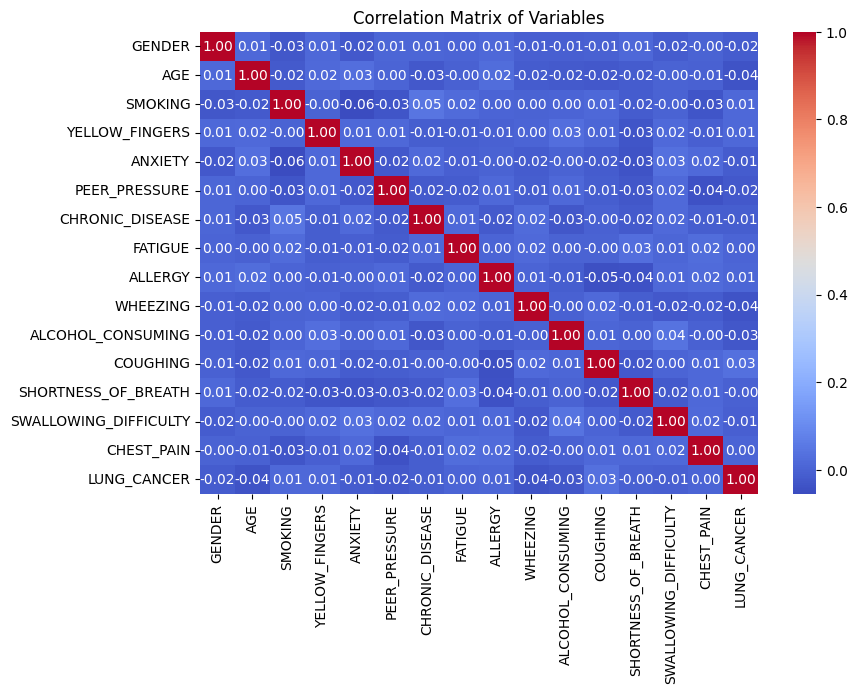

In [ ]:
# @title Correlation Matrix
correlation_matrix = lung_cancer.corr()

plt.figure(figsize=(9,6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Variables')
plt.show()

# Initial Model Development
* Decision Tree- Splits the data into smaller groups based on yes/no questions, like “Does the patient smoke?” or “Does the patient have chest pain?”. It’s good for classification because it’s easy to understand, shows which factors are most important, and works well even if the data doesn’t follow a clear pattern.
* Random Forest- Combines lots of decision trees, making it more accurate and less likely to overfit, especially with many factors involved.
* K-Nearest Neighbors (KNN)- Compares each patient to similar ones, which can work well if patients with similar symptoms tend to have the same diagnosis.
* Gradient Boosting Machine (GBM)- Builds decision trees one at a time, each trying to fix the mistakes of the previous one, making very accurate predictions.
* Logistic Regression- Predicts the chance of lung cancer by finding patterns in the data, like how smoking or chest pain changes the risk. It’s simple, fast, and helps you understand which factors matter most.
* Accuracy- Measures the proportion of correct predictions made by the model out of all predictions.
* Precision- Measures how many of the predicted positive cases were actually positive.
* Recall- Measures how many of the actual positive cases were correctly identified by the model.
* F1-score- Is the harmonic mean of precision and recall, providing a single metric that balances both.

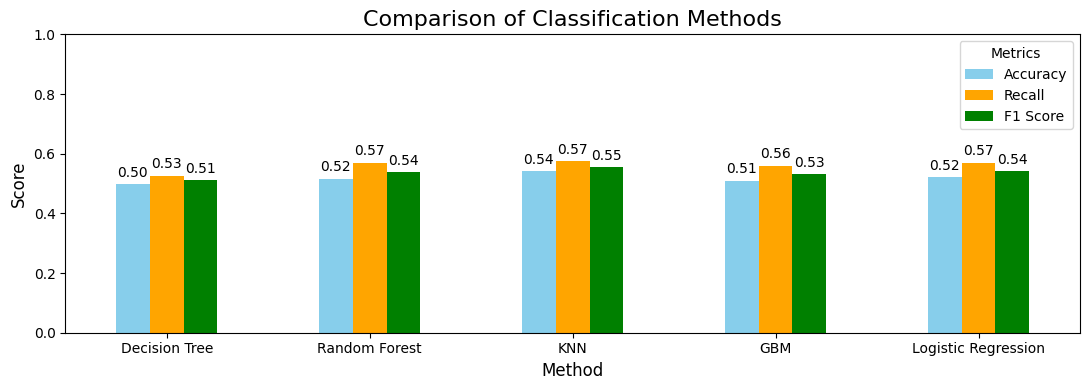

In [ ]:
# @title Initial Model Comparison
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

X = lung_cancer.drop(columns='LUNG_CANCER')
y = lung_cancer['LUNG_CANCER']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree

clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_tree = y_pred


# Random Forest
from sklearn.ensemble import RandomForestClassifier

X2 = lung_cancer.drop(columns='LUNG_CANCER')
y2 = lung_cancer['LUNG_CANCER']

X2 = pd.get_dummies(X2, drop_first=True)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

rf_clf2 = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=42)
rf_clf2.fit(X2_train, y2_train)

y2_pred = rf_clf2.predict(X2_test)
y_pred_rf = y2_pred


# KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

X = lung_cancer.drop('LUNG_CANCER', axis=1)
y = lung_cancer['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
y_pred_knn = y_pred


# GBM
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

gbm = GradientBoostingClassifier()


gbm.fit(X_train_scaled, y_train)


y_pred_gbm = gbm.predict(X_test_scaled)


accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)


# Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = lung_cancer.drop('LUNG_CANCER', axis=1)
y = lung_cancer['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)


y_pred = lr_model.predict(X_test_scaled)
y_pred_log = y_pred



methods = ['Decision Tree', 'Random Forest', 'KNN', "GBM", "Logistic Regression"]
accuracies = [
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_gbm),
    accuracy_score(y_test, y_pred_log)
]

recalls = [
    recall_score(y_test, y_pred_tree),
    recall_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_knn),
    recall_score(y_test, y_pred_gbm),
    recall_score(y_test, y_pred_log)
]

f1_scores = [
    f1_score(y_test, y_pred_tree),
    f1_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_knn),
    f1_score(y_test, y_pred_gbm),
    f1_score(y_test, y_pred_log)
]

metrics_df = pd.DataFrame({
    'Method': methods,
    'Accuracy': accuracies,
    'Recall': recalls,
    'F1 Score': f1_scores
})

ax = metrics_df.set_index('Method').plot(kind='bar', figsize=(11, 4), color=['skyblue', 'orange', 'green'])

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.title('Comparison of Classification Methods', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Method', fontsize=12)
plt.ylim(0, 1)
plt.legend(title="Metrics", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

*   KNN has the overall highest accuracy and F1 score while maintaining a high recall
*   Decision tree has the overall lowest performance across all three metrics

Next Steps
*   Hope to improve model performance through feature engineering techniques such as PCA, duplicating the positive cases, and removing the heavily featured "age" variable


# Feature Engineering

## Modeling With PCA



*   Reduces the number of features by selecting only the most informative components, which can help the model generalize better to unseen data
*   Focuses on the features with the highest variance, effectively filtering out noise and improving the signal-to-noise ratio



In [ ]:
# @title PCA - Components Retained
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = lung_cancer.drop(columns='LUNG_CANCER')
y = lung_cancer['LUNG_CANCER']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f'Number of components retained: {X_pca.shape[1]}')

Number of components retained: 15


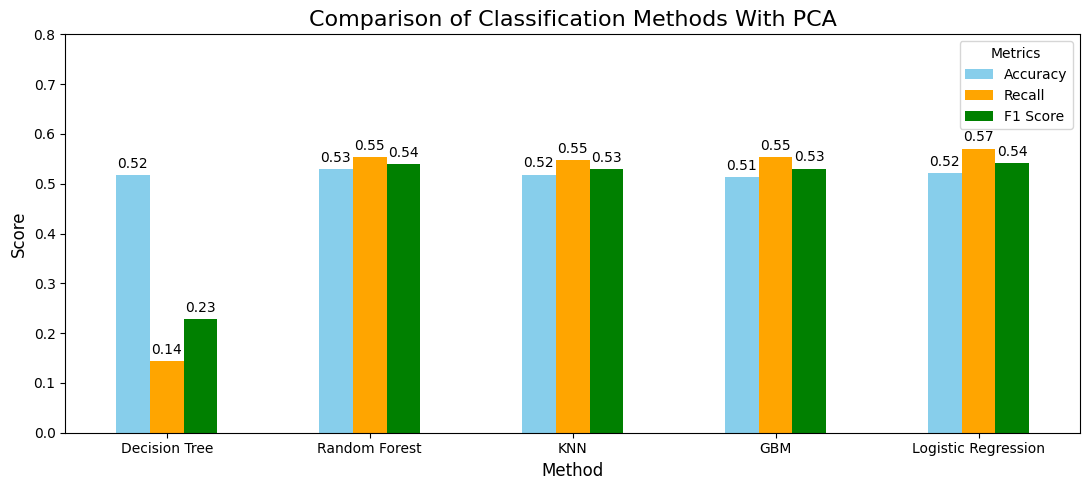

<Figure size 640x480 with 0 Axes>

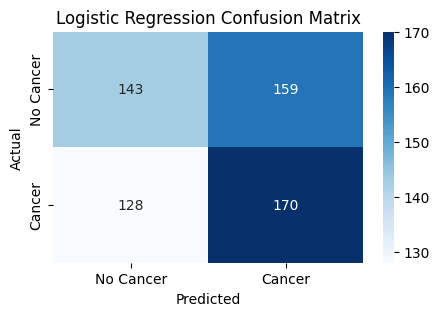

In [ ]:
# @title Comparison of Models with PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



X = lung_cancer.drop(columns='LUNG_CANCER')
y = lung_cancer['LUNG_CANCER']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)


# Decision Tree
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

clf_pca = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf_pca.fit(X_train_pca, y_train)

y_pred_pca = clf_pca.predict(X_test_pca)
y_pred_tree_pca = y_pred_pca

# Random Forest
rf_clf_pca = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf_pca.fit(X_train_pca, y_train)

y_pred_rf_pca = rf_clf_pca.predict(X_test_pca)




# KNN
knn_pca = KNeighborsClassifier(n_neighbors=11)

knn_pca.fit(X_train_pca, y_train)

y_pred_knn_pca = knn.predict(X_test_pca)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn_pca)



# GBM
gbm_pca = GradientBoostingClassifier()

gbm_pca.fit(X_train_pca, y_train)

y_pred_gbm_pca = gbm_pca.predict(X_test_pca)




# Logistic Regression


lr_model_pca = LogisticRegression(random_state=42)
lr_model_pca.fit(X_train_pca, y_train)


y_pred_log_pca = lr_model_pca.predict(X_test_pca)
conf_matrix_log_pca = confusion_matrix(y_test, y_pred_log_pca)




methods_pca = ['Decision Tree', 'Random Forest', 'KNN', "GBM", "Logistic Regression"]
accuracies_pca = [
    accuracy_score(y_test, y_pred_tree_pca),
    accuracy_score(y_test, y_pred_rf_pca),
    accuracy_score(y_test, y_pred_knn_pca),
    accuracy_score(y_test, y_pred_gbm_pca),
    accuracy_score(y_test, y_pred_log_pca)
]

recalls_pca = [
    recall_score(y_test, y_pred_tree_pca),
    recall_score(y_test, y_pred_rf_pca),
    recall_score(y_test, y_pred_knn_pca),
    recall_score(y_test, y_pred_gbm_pca),
    recall_score(y_test, y_pred_log_pca)
]

f1_scores_pca = [
    f1_score(y_test, y_pred_tree_pca),
    f1_score(y_test, y_pred_rf_pca),
    f1_score(y_test, y_pred_knn_pca),
    f1_score(y_test, y_pred_gbm_pca),
    f1_score(y_test, y_pred_log_pca)
]

metrics_df_pca = pd.DataFrame({
    'Method': methods_pca,
    'Accuracy': accuracies_pca,
    'Recall': recalls_pca,
    'F1 Score': f1_scores_pca
})

ax = metrics_df_pca.set_index('Method').plot(kind='bar', figsize=(11, 5), color=['skyblue', 'orange', 'green'])


for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.title('Comparison of Classification Methods With PCA', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Method', fontsize=12)


plt.ylim(0, .8)

plt.legend(title="Metrics", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.subplots_adjust(hspace=2.0)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_log_pca, annot=True, fmt="d", cmap="Blues", xticklabels=["No Cancer", "Cancer"], yticklabels=["No Cancer", "Cancer"])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

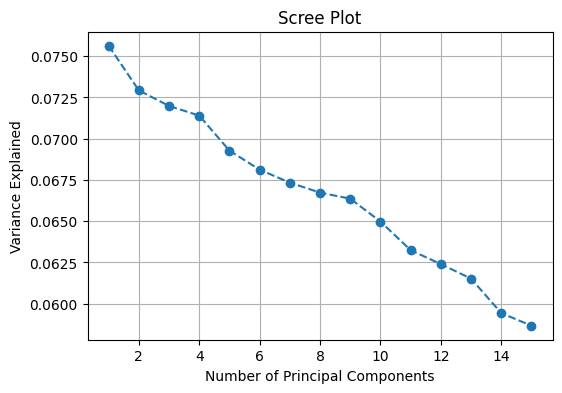

In [ ]:
# @title Scree Plot - plots that help in deciding how many principal components to retain in PCA by visualizing the proportion of variance explained by each
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

## Modeling with Positive Case Duplication



*   By duplicating the positive cases, we artificially increase their representation in the dataset

*   Enhances the model's ability to generalize patterns related to positive cases during training and improves positive case recall



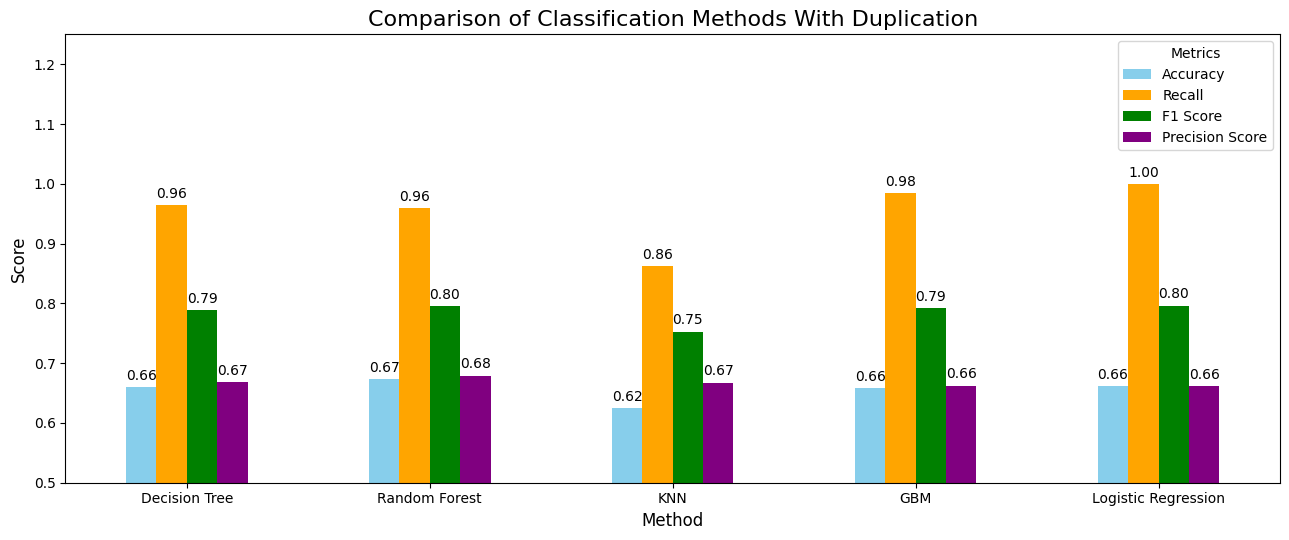

In [ ]:
# @title Comparison of Models with Positive Case Duplication
lung_cancer_with_duplication = pd.concat([lung_cancer, lung_cancer[lung_cancer['LUNG_CANCER'] == 1]])

X5 = lung_cancer_with_duplication.drop('LUNG_CANCER', axis=1)
y5 = lung_cancer_with_duplication['LUNG_CANCER']

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled5 = scaler.fit_transform(X_train5)
X_test_scaled5 = scaler.transform(X_test5)

# Decision Tree with Duplication

clf5 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf5.fit(X_train5, y_train5)

y_pred5 = clf5.predict(X_test5)
y_pred_tree5 = y_pred5



# Random Forest
rf_clf5 = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=42)
rf_clf5.fit(X_train5, y_train5)

y_pred5 = rf_clf5.predict(X_test5)
y_pred_rf5 = y_pred5

accuracy = accuracy_score(y_test5, y_pred5)


# KNN
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train_scaled5, y_train5)

y_pred5 = knn.predict(X_test_scaled5)
y_pred_knn5 = y_pred5
conf_matrix_rf5 = confusion_matrix(y_test5, y_pred_rf5)



# GBM
gbm5 = GradientBoostingClassifier()

gbm5.fit(X_train_scaled5, y_train5)

y_pred_gbm5 = gbm5.predict(X_test_scaled5)

accuracy_gbm5= accuracy_score(y_test5, y_pred_gbm5)
conf_matrix_gbm5 = confusion_matrix(y_test5, y_pred_gbm5)
class_report_gbm5 = classification_report(y_test5, y_pred_gbm5)


# Logistic Regression


lr_model5 = LogisticRegression(random_state=42)
lr_model5.fit(X_train_scaled5, y_train5)


y_pred5 = lr_model5.predict(X_test_scaled5)
y_pred_log5 = y_pred5
conf_matrix_log5 = confusion_matrix(y_test5, y_pred_log5)



methods5 = ['Decision Tree', 'Random Forest', 'KNN', "GBM", "Logistic Regression"]
accuracies5 = [
    accuracy_score(y_test5, y_pred_tree5),
    accuracy_score(y_test5, y_pred_rf5),
    accuracy_score(y_test5, y_pred_knn5),
    accuracy_score(y_test5, y_pred_gbm5),
    accuracy_score(y_test5, y_pred_log5)
]

recalls5 = [
    recall_score(y_test5, y_pred_tree5),
    recall_score(y_test5, y_pred_rf5),
    recall_score(y_test5, y_pred_knn5),
    recall_score(y_test5, y_pred_gbm5),
    recall_score(y_test5, y_pred_log5)
]

f1_scores5 = [
    f1_score(y_test5, y_pred_tree5),
    f1_score(y_test5, y_pred_rf5),
    f1_score(y_test5, y_pred_knn5),
    f1_score(y_test5, y_pred_gbm5),
    f1_score(y_test5, y_pred_log5)
]

precision_scores5 = [
    precision_score(y_test5, y_pred_tree5),
    precision_score(y_test5, y_pred_rf5),
    precision_score(y_test5, y_pred_knn5),
    precision_score(y_test5, y_pred_gbm5),
    precision_score(y_test5, y_pred_log5)
]

metrics_df5 = pd.DataFrame({
    'Method': methods5,
    'Accuracy': accuracies5,
    'Recall': recalls5,
    'F1 Score': f1_scores5,
    'Precision Score': precision_scores5
})

ax = metrics_df5.set_index('Method').plot(kind='bar', figsize=(13, 5.5), color=['skyblue', 'orange', 'green', 'purple'])


for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.title('Comparison of Classification Methods With Duplication', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Method', fontsize=12)


plt.ylim(0.5, 1.25)

plt.legend(title="Metrics", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




*   Misleading high recall scores that also contribute to high F1 scores
*   Despite logistic regression having a higher recall score, random forest is a better overall model after duplicating positive cases
*   Overall, all of these models are over-predicting positive cancer diagnoses







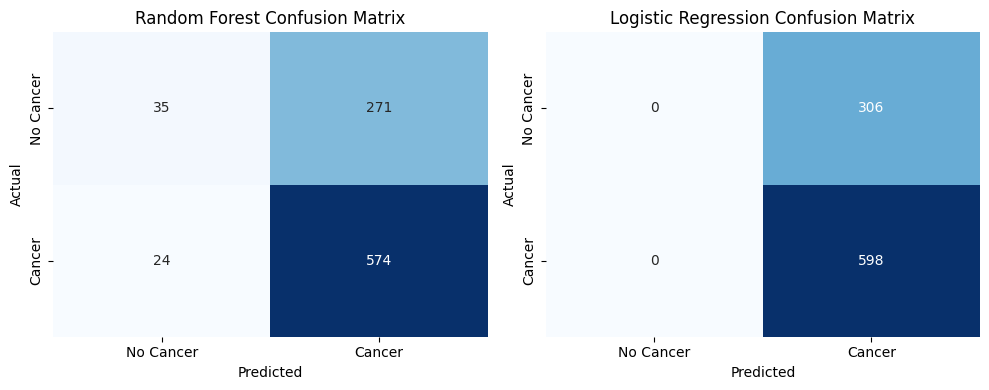

In [ ]:
# @title Random Forest vs. Logistic Regression Confusion Matrices (Duplication)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(conf_matrix_rf5, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Cancer", "Cancer"], yticklabels=["No Cancer", "Cancer"], ax=axes[0], cbar=False)
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(conf_matrix_log5, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Cancer", "Cancer"], yticklabels=["No Cancer", "Cancer"], ax=axes[1], cbar=False)
axes[1].set_title("Logistic Regression Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.subplots_adjust(wspace=0.6)
plt.tight_layout()
plt.show()



## Modeling After Removing Age



*   From the feature importance plot for the inital model, age is highly influential compared to other features
*   With the model relies heavily on age, it may fail to learn the contribution of other features, leading to a less robust model
*   Removing age could force the model to focus on other predictors, possibly uncovering hidden patterns






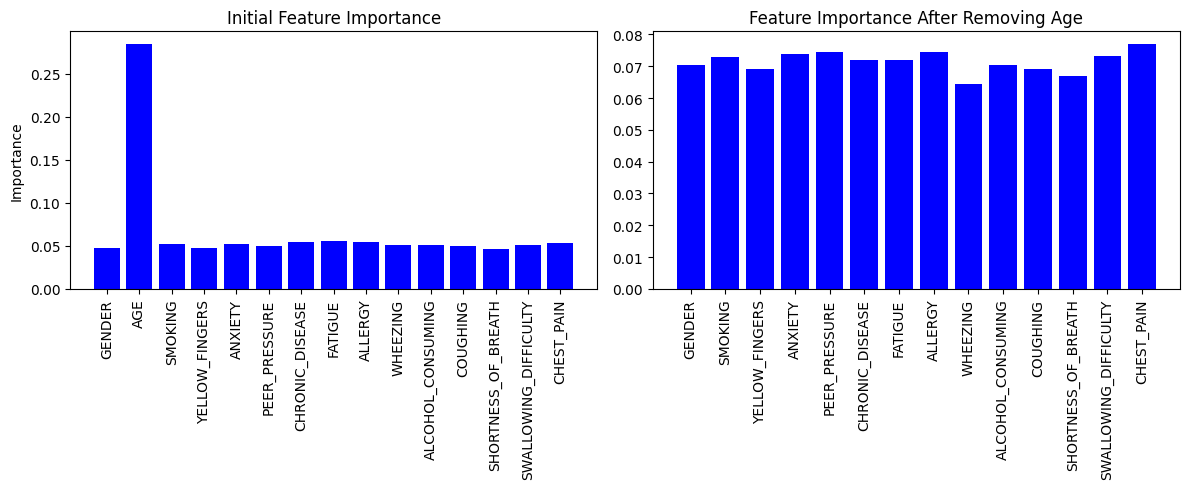

In [ ]:
# @title Feature Importance Comparison After "Age" Removal
feature_importances1 = rf_clf2.feature_importances_


X6 = lung_cancer.drop(columns=['LUNG_CANCER', 'AGE'])
y6 = lung_cancer['LUNG_CANCER']


X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled6 = scaler.fit_transform(X_train6)
X_test_scaled6 = scaler.transform(X_test6)

rf_clf6 = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=42)
rf_clf6.fit(X_train6, y_train6)

feature_importances2 = rf_clf6.feature_importances_

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(X.columns, feature_importances1, color='blue')
axes[0].set_xticks(range(len(X.columns)))
axes[0].set_xticklabels(X.columns, rotation=90)
axes[0].set_title('Initial Feature Importance')
axes[0].set_ylabel('Importance')

axes[1].bar(X6.columns, feature_importances2, color='blue')
axes[1].set_xticks(range(len(X6.columns)))
axes[1].set_xticklabels(X6.columns, rotation=90)
axes[1].set_title('Feature Importance After Removing Age')

plt.tight_layout()
plt.show()

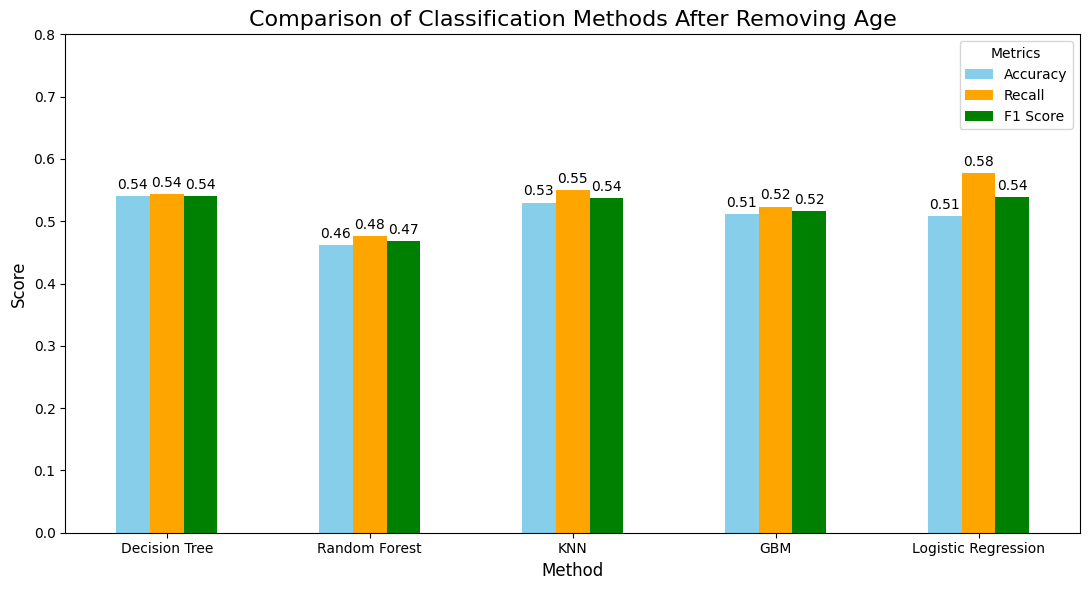

<Figure size 640x480 with 0 Axes>

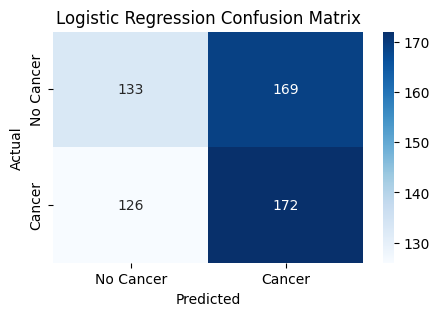

In [ ]:
# @title Comparison of Models After Removing Age
X6 = lung_cancer.drop(columns=['LUNG_CANCER', 'AGE'])
y6 = lung_cancer['LUNG_CANCER']


X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled6 = scaler.fit_transform(X_train6)
X_test_scaled6 = scaler.transform(X_test6)

# Decision Tree with Duplication

clf6 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf6.fit(X_train6, y_train6)

y_pred6 = clf6.predict(X_test6)
y_pred_tree6 = y_pred6



# Random Forest
rf_clf6 = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=42)
rf_clf6.fit(X_train6, y_train6)

y_pred6 = rf_clf6.predict(X_test6)
y_pred_rf6 = y_pred6

accuracy = accuracy_score(y_test6, y_pred6)
conf_matrix_rf6 = confusion_matrix(y_test6, y_pred_rf6)


# KNN
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train_scaled6, y_train6)

y_pred6 = knn.predict(X_test_scaled6)
y_pred_knn6 = y_pred6



# GBM
gbm6 = GradientBoostingClassifier()

gbm6.fit(X_train_scaled6, y_train6)

y_pred_gbm6 = gbm6.predict(X_test_scaled6)

accuracy_gbm6= accuracy_score(y_test6, y_pred_gbm6)
conf_matrix_gbm6 = confusion_matrix(y_test6, y_pred_gbm6)
class_report_gbm6 = classification_report(y_test6, y_pred_gbm6)


# Logistic Regression


lr_model6 = LogisticRegression(random_state=42)
lr_model6.fit(X_train_scaled6, y_train6)


y_pred6 = lr_model6.predict(X_test_scaled6)
y_pred_log6 = y_pred6
conf_matrix_log6 = confusion_matrix(y_test6, y_pred_log6)




methods6 = ['Decision Tree', 'Random Forest', 'KNN', "GBM", "Logistic Regression"]
accuracies6 = [
    accuracy_score(y_test6, y_pred_tree6),
    accuracy_score(y_test6, y_pred_rf6),
    accuracy_score(y_test6, y_pred_knn6),
    accuracy_score(y_test6, y_pred_gbm6),
    accuracy_score(y_test6, y_pred_log6)
]

recalls6 = [
    recall_score(y_test6, y_pred_tree6),
    recall_score(y_test6, y_pred_rf6),
    recall_score(y_test6, y_pred_knn6),
    recall_score(y_test6, y_pred_gbm6),
    recall_score(y_test6, y_pred_log6)
]

f1_scores6 = [
    f1_score(y_test6, y_pred_tree6),
    f1_score(y_test6, y_pred_rf6),
    f1_score(y_test6, y_pred_knn6),
    f1_score(y_test6, y_pred_gbm6),
    f1_score(y_test6, y_pred_log6)
]

metrics_df6 = pd.DataFrame({
    'Method': methods6,
    'Accuracy': accuracies6,
    'Recall': recalls6,
    'F1 Score': f1_scores6
})

ax = metrics_df6.set_index('Method').plot(kind='bar', figsize=(11, 6), color=['skyblue', 'orange', 'green'])

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.title('Comparison of Classification Methods After Removing Age', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Method', fontsize=12)

plt.ylim(0.0, .8)

plt.legend(title="Metrics", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


plt.subplots_adjust(hspace=2.0)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_log6, annot=True, fmt="d", cmap="Blues", xticklabels=["No Cancer", "Cancer"], yticklabels=["No Cancer", "Cancer"])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Limitations
* Dataset is mostly binary
* Data doesn't specify severity
* Only includes one numerical variable
* Doesn't include other potentially influential factors like air pollution, exposure to heavy metals, genetics, etc.

# Conclusion
* Dataset is limited
* Age is most influential predictor
* Random Forest with Duplication model (67% accuracy) is our best model, but does not meet 80% accuracy goal
* Random Forest with Duplication model can be used, but it would need to be followed up with lung imaging

#### Final Question: Can various health and behavioral risk factors predict lung cancer prevalence?
*   These factors do not seem to have high predictive power towards diagnosing lung cancer







## Sources


*   Data: https://data.poltekkes-smg.ac.id/dataset/lung-cancer-dataset
*   https://pmc.ncbi.nlm.nih.gov/articles/PMC10025752/#b0005
*   https://www.cancer.org/cancer/types/lung-cancer/about/key-statistics.html#:~:text=About%20234%2C580%20new%20cases%20of,breast%2C%20and%20prostate%20cancers%20combined.
*   https://jamanetwork.com/journals/jamaoncology/fullarticle/2801798#:~:text=Data%20were%20collected%20on%20April%2025%2C%202022.&text=First%2C%20we%20estimated%20that%20between%202020%20and,world's%20largest%20economy%20in%202017%20INT%20$).
*   https://seer.cancer.gov/statfacts/html/common.html





